In [16]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import matplotlib.dates as mdates
from matplotlib import style
from mpl_finance import candlestick_ohlc
style.use('ggplot')

In [24]:
info = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

In [25]:
info.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,223.089996,225.679993,222.250000,222.410004,222.410004,2402100
2015-01-02,222.869995,223.250000,213.259995,219.309998,219.309998,4764400
2015-01-05,214.550003,216.500000,207.160004,210.089996,210.089996,5368500
2015-01-06,210.059998,214.199997,204.210007,211.279999,211.279999,6261900
2015-01-07,213.350006,214.779999,209.779999,210.949997,210.949997,2968400


In [26]:
info_ohlc = info.Close.resample('5D').ohlc()
info_volume = info.Volume.resample('5D').sum()

In [27]:
info_ohlc.head()

,open,high,low,close
Date,,,,
2014-12-31,222.410004,222.410004,219.309998,219.309998
2015-01-05,210.089996,211.279999,206.660004,206.660004
2015-01-10,202.210007,204.250000,192.690002,192.690002
2015-01-15,191.869995,193.070007,191.869995,193.070007
2015-01-20,191.929993,201.619995,191.929993,201.289993


In [28]:
info_ohlc.reset_index(inplace=True)
info_ohlc.Date = info_ohlc.Date.map(mdates.date2num)

In [29]:
ax_1 = plt.subplot2grid((6,1),(0,0), rowspan=5, colspan=1)
ax_2 = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1, sharex=ax_1)
ax_1.xaxis_date()

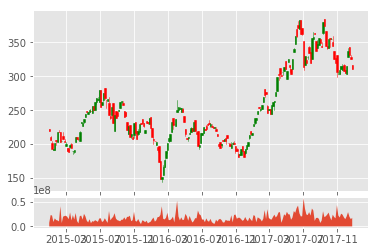

In [30]:
candlestick_ohlc(ax_1,info_ohlc.values, width=5, colorup='g')
ax_2.fill_between(info_volume.index.map(mdates.date2num),info_volume.values, 0)
plt.show()